## Read the dataset and knowing what the data is

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

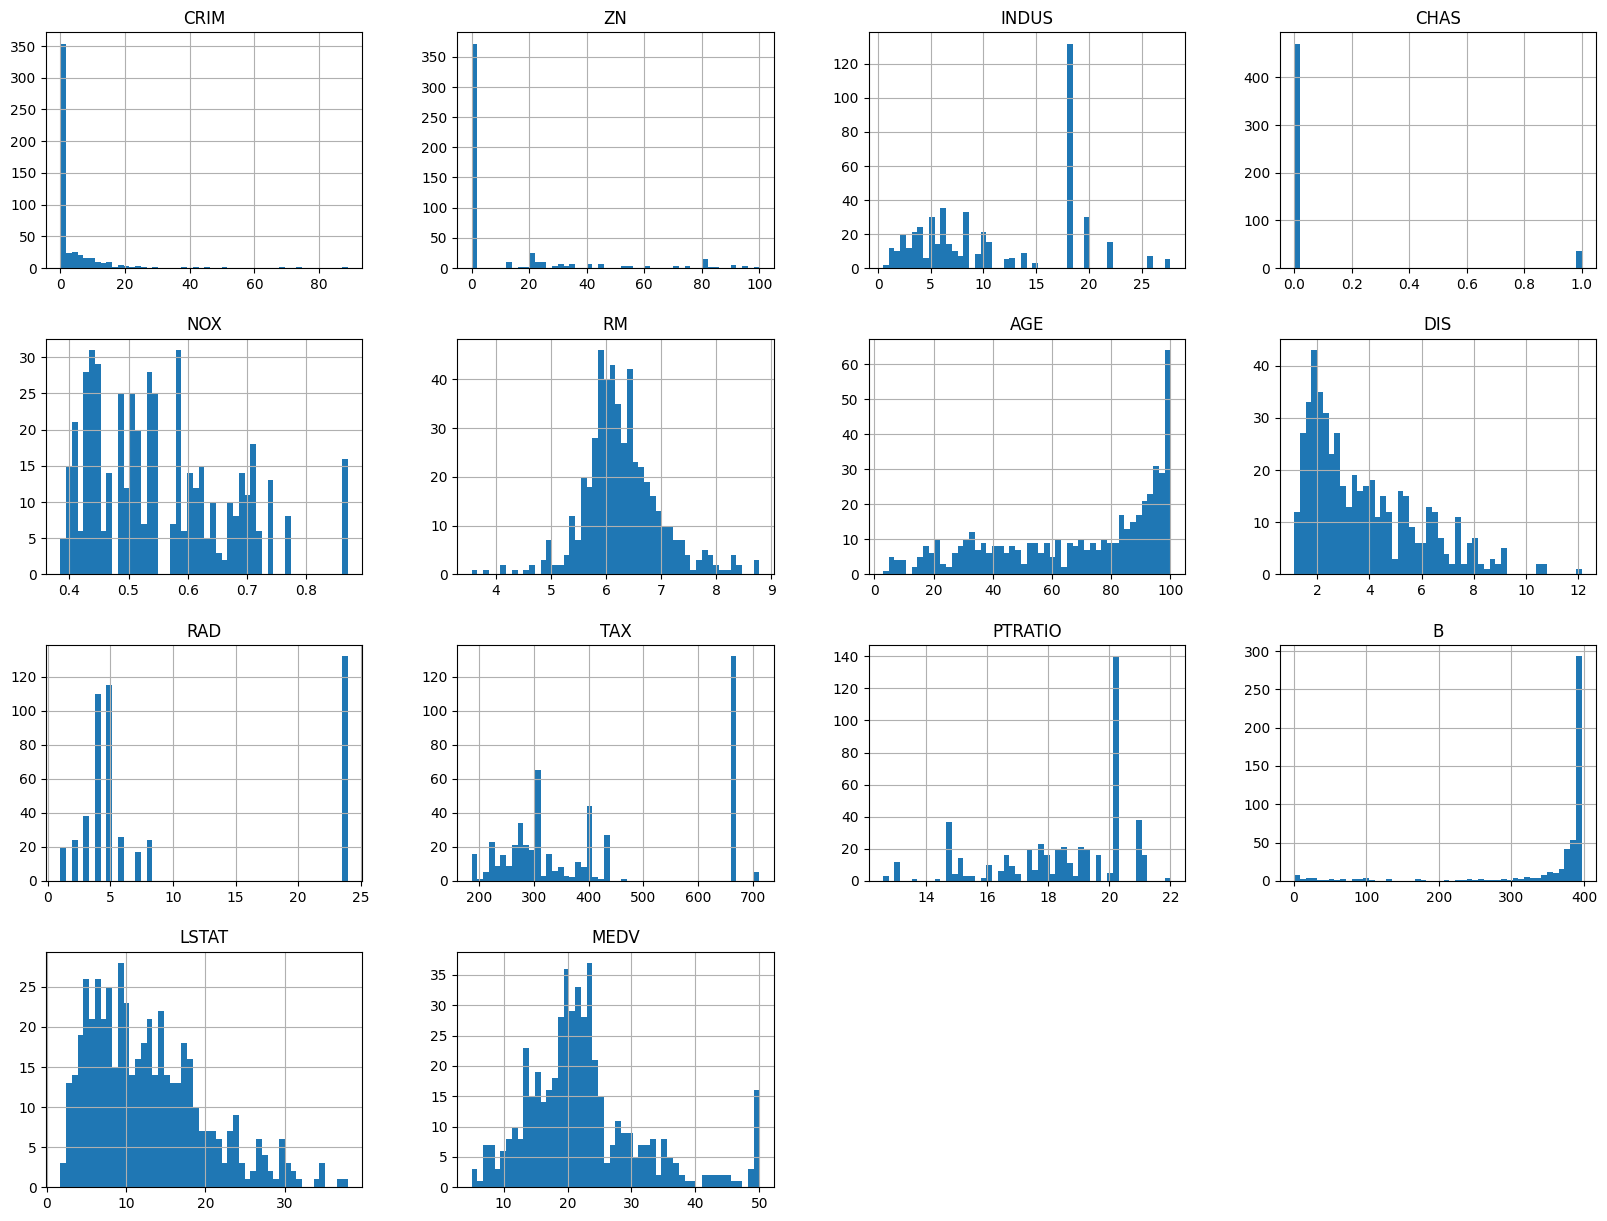

In [8]:
housing.hist(bins=50, figsize=(20,15))

## Split the dataset into training module and testing module

1) Using functions

In [9]:
import numpy as np
np.random.seed(101)
def split_test(data,test_ratio):
    perm_data = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = perm_data[:test_set_size]
    train_indices = perm_data[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set,test_set = split_test(housing,0.2)

In [11]:
print(len(train_set))

405


In [12]:
print(len(test_set))

101


2) Using sklearn

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size= 0.2, random_state = 101)

In [14]:
len(train_set)

404

In [15]:
len(test_set)

102

In [16]:
housing = train_set.copy()

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.700132
ZN         0.355325
B          0.341085
DIS        0.244191
CHAS       0.191305
AGE       -0.365300
RAD       -0.373719
CRIM      -0.376683
NOX       -0.409724
TAX       -0.458540
INDUS     -0.472666
PTRATIO   -0.519760
LSTAT     -0.742663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

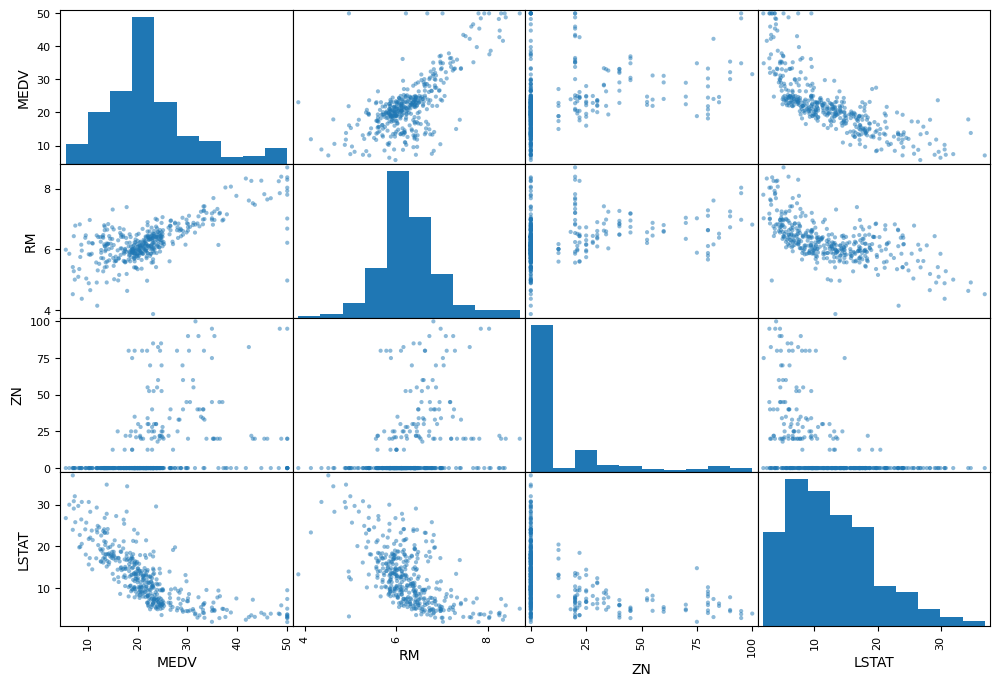

In [19]:
from pandas.plotting import scatter_matrix

attr = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attr],figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

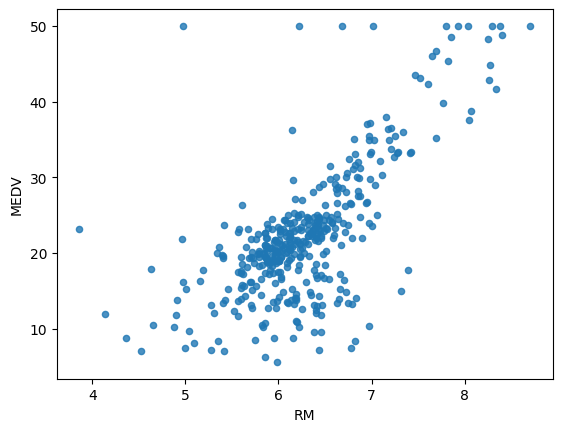

In [20]:
housing.plot(kind = "scatter", x = "RM" , y = "MEDV", alpha = 0.8)

## Combining Attributes to create new features

In [21]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
288,0.04590,52.5,5.32,0,0.405,6.315,45.6,7.3172,6,293,16.6,396.90,7.60,22.3,46.397466
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8,50.288541
471,4.03841,0.0,18.10,0,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87,19.6,106.919249
176,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2,49.169435
320,0.16760,0.0,7.38,0,0.493,6.426,52.3,4.5404,5,287,19.6,396.90,7.20,23.8,44.662309


In [23]:
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.700132
ZN         0.355325
B          0.341085
DIS        0.244191
CHAS       0.191305
AGE       -0.365300
RAD       -0.373719
CRIM      -0.376683
NOX       -0.409724
TAX       -0.458540
INDUS     -0.472666
PTRATIO   -0.519760
LSTAT     -0.742663
Name: MEDV, dtype: float64

In [24]:
corr_matrix = housing.corr()

In [25]:
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.700132
ZN         0.355325
B          0.341085
DIS        0.244191
CHAS       0.191305
AGE       -0.365300
RAD       -0.373719
CRIM      -0.376683
NOX       -0.409724
TAX       -0.458540
INDUS     -0.472666
PTRATIO   -0.519760
TAXRM     -0.539417
LSTAT     -0.742663
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

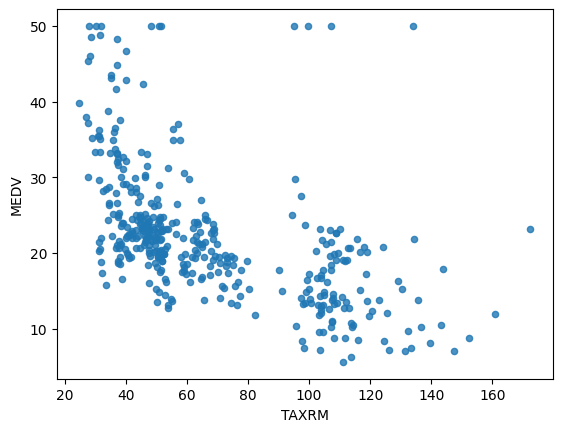

In [26]:
housing.plot(kind = "scatter", x = "TAXRM" , y = "MEDV", alpha = 0.8)

In [27]:
housing = train_set.drop("MEDV", axis = 1)
housing_labels = train_set["MEDV"].copy()

## Missing Attributes

In [28]:
a = housing.dropna(subset = ["RM"])
a.shape

(399, 13)

In [29]:
housing.drop("RM", axis = 1).shape

(404, 12)

In [30]:
median = housing["RM"].median()

In [31]:
housing["RM"].fillna(median)

288    6.315
72     6.065
471    6.229
176    6.020
320    6.426
       ...  
63     6.195
326    6.312
337    5.895
11     6.009
351    6.579
Name: RM, Length: 404, dtype: float64

In [32]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.34405e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.19500e+00, 7.65000e+01, 3.26745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91475e+02, 1.14300e+01])

In [35]:
a = imputer.transform(housing)

In [36]:
a_tr = pd.DataFrame(a,columns = housing.columns)

In [37]:
a_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.359896,11.146040,11.183218,0.066832,0.551791,6.272958,68.166337,3.830082,9.492574,406.710396,18.432178,357.101856,12.631634
std,8.002783,22.448252,6.869269,0.250040,0.113517,0.672978,28.263322,2.085057,8.665693,169.153425,2.149673,91.830737,6.844336
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.863000,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.082327,0.000000,5.190000,0.000000,0.448000,5.897250,45.325000,2.111750,4.000000,279.000000,17.000000,376.462500,7.245000
50%,0.234405,0.000000,9.690000,0.000000,0.538000,6.195000,76.500000,3.267450,5.000000,330.000000,19.050000,391.475000,11.430000
75%,3.594927,20.000000,18.100000,0.000000,0.624000,6.595750,93.825000,5.218725,24.000000,666.000000,20.200000,396.285000,17.102500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.704000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Sci-kit learn

## Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer

pipeline = Pipeline([("imputer",SimpleImputer(strategy = "median")),
                    ("scaler", StandardScaler())])
                     

In [39]:
final = pipeline.fit_transform(a_tr)

In [40]:
final.shape

(404, 13)

## Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#model = LinearRegression()
model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(final, housing_labels)

RandomForestRegressor()

## Check if the trained model is giving right predictions

In [42]:
few_pts = housing.iloc[:5]
few_labels = housing_labels.iloc[:5]
prep = pipeline.transform(few_pts)
model.predict(prep)

array([22.821, 22.966, 20.183, 22.505, 23.809])

In [43]:
list(few_labels)

[22.3, 22.8, 19.6, 23.2, 23.8]

## Evaluate the model

In [44]:
from sklearn.metrics import mean_squared_error
housing_preds = model.predict(final)
mse = mean_squared_error(housing_labels, housing_preds)
rmse = np.sqrt(mse)

rmse

## Cross validation to prevent over-fitting

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, final, housing_labels, scoring = "neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)

In [47]:
rmse_scores

array([3.00367578, 3.3747315 , 4.33680211, 2.64419315, 2.64890039,
       2.64984279, 2.77096995, 2.70558157, 3.40040099, 4.2162688 ])

## Saving the model

In [48]:
from joblib import load,dump
dump(model, "Predictor.joblib")

['Predictor.joblib']

## Testing the model on Test data

In [49]:
X = test_set.drop("MEDV",axis = 1)
Y = test_set["MEDV"].copy()
X_prep = pipeline.transform(X)
final_test = model.predict(X_prep)
test_mse = mean_squared_error(Y, final_test)
test_rmse = np.sqrt(test_mse)

In [51]:
test_rmse

4.112377322802231

In [53]:
print(final_test, list(Y))

[46.138 34.191 13.306 15.948 28.869 33.247 43.377 16.47  35.745  7.335
 26.413 14.218 18.839 20.911 21.94  32.405  8.014 31.114 26.027 23.892
 11.546 20.857 20.519 32.389 34.39  20.813 26.048 17.249 40.641 32.503
 22.196 19.528 40.568 44.552 27.762 21.757 14.794 19.464  8.794 29.735
 21.671 21.721 40.331 10.834 20.681 23.831 30.086 15.21  26.083 32.089
 35.234 45.223 19.733 29.457 34.164 11.11  19.117 18.046 21.181 18.072
 34.622 12.527 23.95  22.669  9.953 25.181 23.915 19.399 11.675 19.457
 20.643 23.459 17.512 20.59  23.705 17.878 46.    18.554 31.176 10.842
 16.812 20.89  25.398 14.614 18.657 22.571 21.038 26.516 21.077 21.44
 11.709 13.601 23.117 32.118  7.091 40.392 13.079 32.521  9.873 20.829
 34.026 20.045] [50.0, 36.2, 11.7, 14.9, 30.8, 36.1, 50.0, 13.2, 41.3, 8.5, 23.5, 13.3, 20.2, 18.6, 18.5, 27.9, 10.4, 28.5, 28.4, 23.1, 12.8, 21.7, 11.9, 29.6, 37.3, 19.9, 29.0, 18.0, 50.0, 34.6, 24.3, 18.2, 44.0, 50.0, 30.7, 22.6, 14.1, 14.5, 8.4, 32.5, 24.3, 20.6, 43.8, 11.5, 19.9, 23.8, 